# Classification of Breast Cancer Winconsin Dataset

## 1. Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
df = pd.DataFrame(data = data.data , columns= data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['target'] = data.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.shape

(569, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
df['target'].value_counts().sort_values().rename({0 : 'Malignant' , 1:'Benign'})

Malignant    212
Benign       357
Name: target, dtype: int64

In [18]:
X = data.data
y = data.target

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X ,y, random_state = 0)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression().fit(X_train , y_train)

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
yhat = lr.predict(X_test)

In [26]:
from sklearn.metrics import log_loss

yhat_prob = lr.predict_proba(X_test)
log_loss(y_test , yhat_prob)

0.11555116921502248

In [33]:
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , f1_score , accuracy_score , jaccard_score

In [29]:
print(classification_report(y_test , yhat))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [31]:
print(confusion_matrix(y_test , yhat))

[[51  2]
 [ 6 84]]


In [32]:
print('F1 Score: ',f1_score(y_test , yhat))

F1 Score:  0.9545454545454545


In [34]:
print(jaccard_score(y_test , yhat))

0.9130434782608695


In [35]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Standardizing the data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
X_train_st = StandardScaler().fit_transform(X_train)
X_test_st = StandardScaler().fit_transform(X_test)

In [39]:
lr_st = LogisticRegression().fit(X_train_st , y_train)

In [40]:
yhat_st = lr_st.predict(X_test_st)

In [41]:
yhat_prob_st = lr.predict_proba(X_test_st)

In [42]:
log_loss(y_test , yhat_prob_st)

1.2330291261547952

In [44]:
f1_score(y_test , yhat_st)

0.9662921348314608

In [51]:
jaccard_score(y_test , yhat_st)

0.9347826086956522

# Logistic Regression Classification Report

In [47]:
print(classification_report(y_test , yhat_st))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [48]:
print(confusion_matrix(y_test , yhat_st))

[[51  2]
 [ 4 86]]


In [49]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [95]:
print('Train Score: {}\nTest Score: {}'.format(lr_st.score(X_train_st , y_train) , lr_st.score(X_test_st , y_test)))

Train Score: 0.9906103286384976
Test Score: 0.958041958041958


### Decision Function 

In [100]:
lr_st_scores = lr_st.decision_function(X_test_st)

In [108]:
len(lr_st_scores)

143

In [109]:
len(y_test)

143

## 2. Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
clf = DecisionTreeClassifier(max_depth= 4 , min_samples_leaf=8 ).fit(X_train , y_train)

In [90]:
print('Train Score: ' , clf.score(X_train ,y_train))
print('Test Score: ', clf.score(X_test ,y_test))

Train Score:  0.9647887323943662
Test Score:  0.9370629370629371


In [91]:
feat_imp = pd.Series(data = clf.feature_importances_ ,index = data.feature_names )

In [92]:
feat_imp = feat_imp.to_frame().rename(columns={0:'importance'})

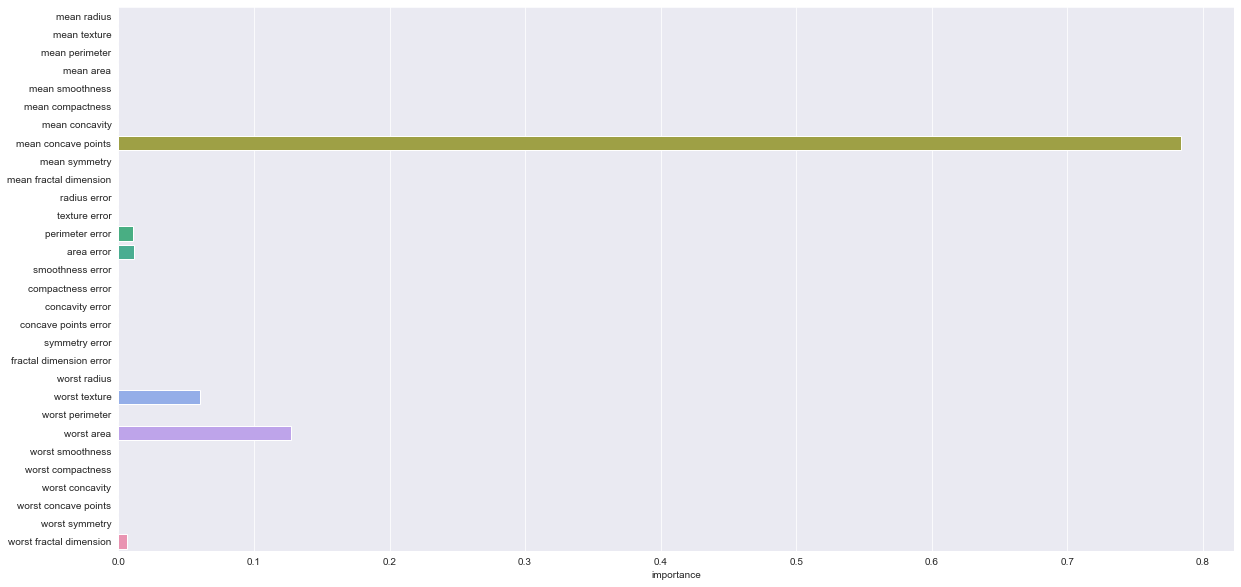

In [93]:
sns.set_style('darkgrid')
plt.figure(figsize= (20,10))
#plt.xticks(rotation = 90)
sns.barplot(y = feat_imp.index , x = feat_imp['importance'] , orient = 'h')

In [103]:
clf_scores = clf.predict_proba(X_test)

# ROC Curve

In [106]:
from sklearn.metrics import roc_auc_score ,roc_curve

In [110]:
fpr_logistic , tpr_logistic , _ = roc_curve(y_test , lr_st_scores)

fpr_dtree , tpr_dtree,_ = roc_curve(y_test , clf_scores[: , 1])

Text(0, 0.5, 'True Positivity Rate')

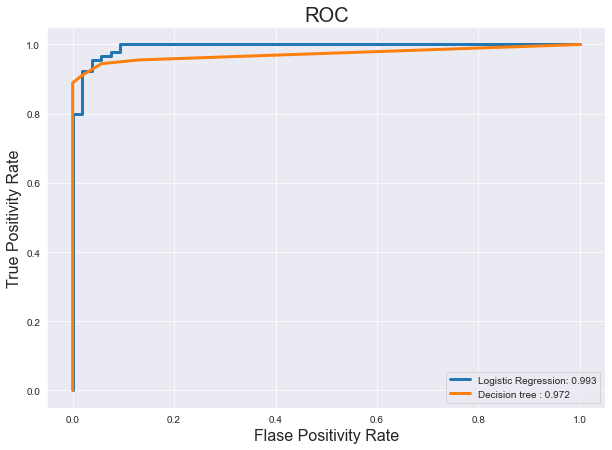

In [119]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')

plt.plot(fpr_logistic , tpr_logistic , lw = 3 , label = 'Logistic Regression: {:.3f}'.format(roc_auc_score(y_test , lr_st_scores)) )
plt.plot(fpr_dtree , tpr_dtree , lw= 3 , label = 'Decision tree : {:.3f}'.format(roc_auc_score(y_test , clf_scores[:,1])))
plt.legend()
plt.title('ROC' , fontsize = 20)
plt.xlabel('Flase Positivity Rate' , fontsize = 16)
plt.ylabel('True Positivity Rate' , fontsize = 16)